# Projeto 2 - Processamento de Imagens
## Técnicas de Visão Computacional e DALL-E

## 1. Carga e Instalação de pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Pacote do open CV
# https://opencv.org/
# https://pypi.org/project/opencv-python/
!pip install -q opencv-python==4.7.0.68

In [3]:
# Importa dos funções

# Importa pacote CV
import cv2

# Manipulação e visualização de dados
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Projeto 2 - Processamento de Imagens" --iversions

Author: Projeto 2 - Processamento de Imagens

cv2       : 4.7.0
matplotlib: 3.5.2
numpy     : 1.21.5



In [5]:
# Função customizada para visualizar as imagens
def visualiza_imagem(*args, figsize = 8, to_rgb = True, title = None, fontsize = 10):
    
    # Ajusta o tamanho da imagem
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    
    # Lista com todas as imagens passadas como argumento
    images = args[0] if type(args[0]) is list else list(args)
    
    # Converteremos as imagens para RGB
    if to_rgb:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    
    # Cada imagem deverá ter um título
    if title is not None:
        assert len(title) == len(images), "Forneça um título para a imagem."
    
    # Tamanho da figurea
    plt.figure(figsize = figsize)
    
    # Cria os subplots para imprimir as imagens
    for i in range(1, len(images) + 1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i - 1], fontsize = fontsize)
        plt.imshow(images[i - 1])
        plt.axis('off')

## 2. Histograma de Imagem

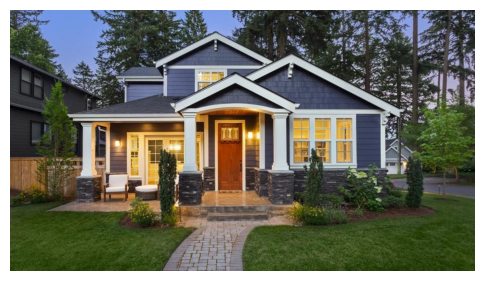

In [6]:
# Carrega e visualiza a imagem
img9 = cv2.imread('imagens/img9.jpg')
visualiza_imagem(img9, figsize = 6)

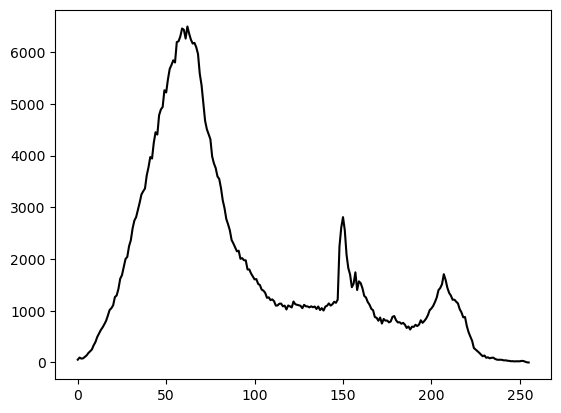

In [7]:
# Cria o histograma para um dos canais de cores, no caso uma imagem em preto e branco
gray_image = cv2.cvtColor(img9, cv2.COLOR_BGR2GRAY)
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.plot(histogram, color = 'k')
plt.show()

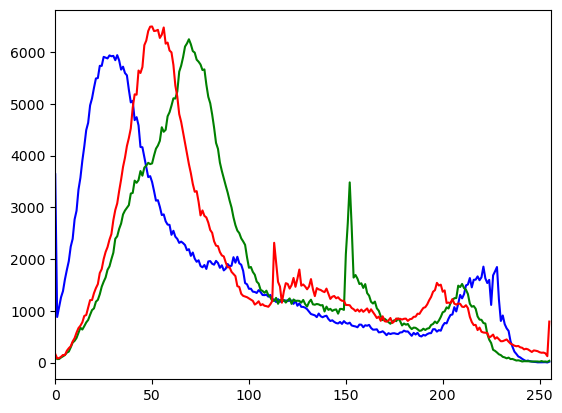

In [8]:
# Cria o histograma para cada um dos canais de cores 
for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([img9], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
    
plt.show()

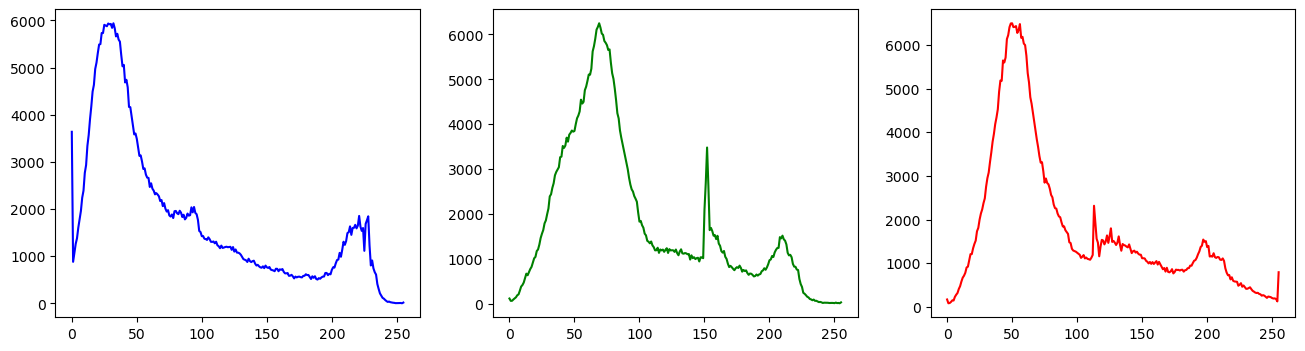

In [9]:
# Histograma de imagem separados por canal de cor
plt.figure(figsize=(16, 4))

hist_b, _ = np.histogram(img9[:,:,0], 256, (0, 255))
plt.subplot(1, 3, 1)
plt.plot(list(range(256)), hist_b, color='blue')

hist_g, _ = np.histogram(img9[:,:,1], 256, (0, 255))
plt.subplot(1, 3, 2)
plt.plot(list(range(256)), hist_g, color='green')

hist_r, _ = np.histogram(img9[:,:,2], 256, (0, 255))
plt.subplot(1, 3, 3)
plt.plot(list(range(256)), hist_r, color='red')

plt.show()

## 3. Equalização de Histograma

In [10]:
# Carrega a imagem na escala de cinza
img9 = cv2.imread('imagens/img9.jpg', cv2.IMREAD_GRAYSCALE)

In [11]:
# Equaliza o histograma da imagem com escala de cinza (1 canal de cor)
equ = cv2.equalizeHist(img9)

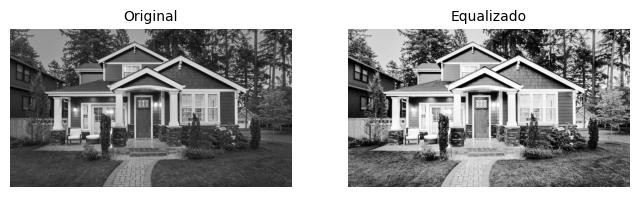

In [12]:
# Visualiza imagem original e com a equalização do histograma
visualiza_imagem(img9, equ, title = ['Original', 'Equalizado'])

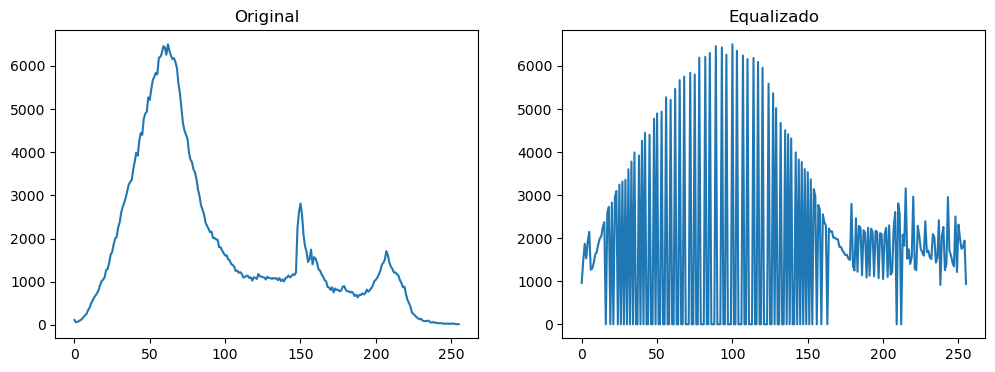

In [13]:
# Plot dos histogramas
plt.figure(figsize = (12, 4))

hist1, _ = np.histogram(img9, 256, (0, 255))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.plot(list(range(256)), hist1)

hist2, _ = np.histogram(equ, 256, (0, 255))
plt.subplot(1, 2, 2)
plt.title('Equalizado')
plt.plot(list(range(256)), hist2)

plt.show()

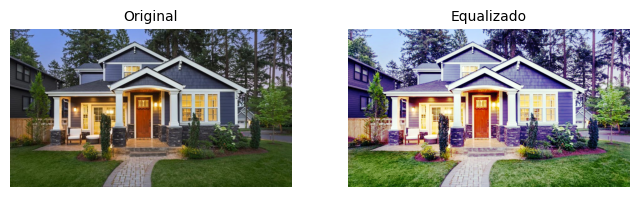

In [14]:
# Equalização de cada canal de cor
img9 = cv2.imread('imagens/img9.jpg')
equ = img9.copy()
equ[:, :, 0] = cv2.equalizeHist(img9[:, :, 0])
equ[:, :, 1] = cv2.equalizeHist(img9[:, :, 1])
equ[:, :, 2] = cv2.equalizeHist(img9[:, :, 2])
visualiza_imagem(img9, equ, title=['Original', 'Equalizado'])